In [2]:
!python3 --version

Python 3.11.13


In [3]:
!pip uninstall -y numpy pandas pycaret

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2


In [4]:
!pip install numpy==1.24.4 pandas==2.0.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 159.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 170.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.3 which is incompatible.
blosc2 3.5.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.24.4 which is incompatible.
plotnine 0.14.6 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.
pymc 5.23.0 req

In [1]:
import numpy, pandas, sklearn
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("sklearn:", sklearn.__version__)

numpy: 1.24.4
pandas: 2.0.3
sklearn: 1.6.1


In [2]:
!pip install pycaret==3.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 5.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 148.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 166.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.

In [1]:
import pandas as pd
import numpy as np
from pycaret.classification import setup

## Upload Files

Use https://www.kaggle.com/code/fatmanu/machine-learning-algorithms?select=Dry_Bean.csv to download the dataset, and then upload in the next cell.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Dry_Bean.csv to Dry_Bean.csv


In [3]:
!ls /content/

Dry_Bean.csv  logs.log	sample_data


## Load the data and perform quick cleaning

In [4]:
import pandas as pd
import numpy as np

# Use the file from Kaggle or your uploaded file name
csv_path = "/content/Dry_Bean.csv"
df_raw = pd.read_csv(csv_path)

# Basic shape and peek
print(df_raw.shape)
df_raw.head(3)

(13611, 17)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER


In [5]:
df = df_raw.copy()
df.columns = [c.strip().replace(" ", "_") for c in df.columns]  # safe colnames

# Target is usually named 'Class' (or 'Class_') – confirm:
assert 'Class' in df.columns or 'class' in [c.lower() for c in df.columns], "Target column 'Class' not found."
target_col = 'Class' if 'Class' in df.columns else [c for c in df.columns if c.lower()=='class'][0]

# Quick info
print("Target:", target_col)
print(df[target_col].value_counts())
print("\nNA counts:\n", df.isna().sum().sort_values(ascending=False).head(10))


Target: Class
Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

NA counts:
 Area            0
Solidity        0
ShapeFactor4    0
ShapeFactor3    0
ShapeFactor2    0
ShapeFactor1    0
Compactness     0
roundness       0
Extent          0
Perimeter       0
dtype: int64


## Train/validation split

In [6]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(
    df, test_size=0.2, random_state=42, stratify=df[target_col]
)

df_train.shape, df_test.shape


((10888, 17), (2723, 17))

## PyCaret Classification — setup (multiclass, GPU)

In [7]:
from pycaret.classification import *

exp = setup(
    data=df_train,              # or use data=df if you skip external holdout
    target=target_col,
    train_size=0.8,             # train/valid inside df_train
    session_id=42,
    use_gpu="force",
    fold=5,
    normalize=True,
    categorical_imputation='mode',
    numeric_imputation='median'
)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA A100-SXM4-40GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet 

,Description,Value
0,Session id,42
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"BARBUNYA: 0, BOMBAY: 1, CALI: 2, DERMASON: 3, HOROZ: 4, SEKER: 5, SIRA: 6"
4,Original data shape,"(10888, 17)"
5,Transformed data shape,"(10888, 17)"
6,Transformed train set shape,"(8710, 17)"
7,Transformed test set shape,"(2178, 17)"
8,Numeric features,16
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA A100-SXM4-40GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet 

## Compare models (AutoML)

In [8]:
# Macro F1 focuses on balanced performance across all classes
best = compare_models(sort='F1', exclude=['rf']) # Random Forest is crashing
best


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9240,0.9933,0.9240,0.9245,0.9241,0.9080,0.9081,3.4500
xgboost,Extreme Gradient Boosting,0.9240,0.9932,0.9240,0.9245,0.9240,0.9080,0.9081,1.1980
gbc,Gradient Boosting Classifier,0.9230,0.0000,0.9230,0.9235,0.9230,0.9068,0.9069,35.9440
lr,Logistic Regression,0.9226,0.0000,0.9226,0.9234,0.9228,0.9064,0.9065,0.8300
knn,K Neighbors Classifier,0.9183,0.9826,0.9183,0.9190,0.9184,0.9011,0.9012,0.3920
et,Extra Trees Classifier,0.9158,0.9910,0.9158,0.9163,0.9159,0.8982,0.8983,0.3340
qda,Quadratic Discriminant Analysis,0.9083,0.0000,0.9083,0.9122,0.9087,0.8893,0.8901,0.0940
lda,Linear Discriminant Analysis,0.9026,0.0000,0.9026,0.9133,0.9043,0.8823,0.8841,0.1480
nb,Naive Bayes,0.8941,0.9897,0.8941,0.8956,0.8943,0.8722,0.8725,0.1000
dt,Decision Tree Classifier,0.8933,0.9344,0.8933,0.8937,0.8933,0.8711,0.8712,0.2720


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-11-09 06:56:21.074] [CUML] [info] Unused keyword parameter: n_jobs during cuML estimator initialization


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               device='gpu', importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [9]:
leaderboard = pull()
leaderboard.head(10)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9240,0.9933,0.9240,0.9245,0.9241,0.9080,0.9081,3.450
xgboost,Extreme Gradient Boosting,0.9240,0.9932,0.9240,0.9245,0.9240,0.9080,0.9081,1.198
gbc,Gradient Boosting Classifier,0.9230,0.0000,0.9230,0.9235,0.9230,0.9068,0.9069,35.944
lr,Logistic Regression,0.9226,0.0000,0.9226,0.9234,0.9228,0.9064,0.9065,0.830
knn,K Neighbors Classifier,0.9183,0.9826,0.9183,0.9190,0.9184,0.9011,0.9012,0.392
et,Extra Trees Classifier,0.9158,0.9910,0.9158,0.9163,0.9159,0.8982,0.8983,0.334
qda,Quadratic Discriminant Analysis,0.9083,0.0000,0.9083,0.9122,0.9087,0.8893,0.8901,0.094
lda,Linear Discriminant Analysis,0.9026,0.0000,0.9026,0.9133,0.9043,0.8823,0.8841,0.148
nb,Naive Bayes,0.8941,0.9897,0.8941,0.8956,0.8943,0.8722,0.8725,0.100
dt,Decision Tree Classifier,0.8933,0.9344,0.8933,0.8937,0.8933,0.8711,0.8712,0.272


## Train strong candidates + hyperparameter tuning

In [10]:
# Tune xgboost, lightgbm, gbc as they are the top 3

# Step 1: Create the models
xgboost = create_model('xgboost')
lightgbm = create_model('lightgbm')
gbc = create_model('gbc')

# Step 2: Tune the trained model objects
xgboost_tuned = tune_model(xgboost, optimize='F1', choose_better=True)
lightgbm_tuned = tune_model(lightgbm, optimize='F1', choose_better=True)
gbc_tuned = tune_model(gbc, optimize='F1', choose_better=True)



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9237,0.9936,0.9237,0.9241,0.9237,0.9076,0.9077
1,0.9248,0.9934,0.9248,0.9248,0.9246,0.9090,0.9091
2,0.9265,0.9927,0.9265,0.9267,0.9264,0.9111,0.9111
3,0.9277,0.9937,0.9277,0.9285,0.9278,0.9126,0.9126
4,0.9173,0.9927,0.9173,0.9182,0.9176,0.8999,0.9000
Mean,0.9240,0.9932,0.9240,0.9245,0.9240,0.9080,0.9081
Std,0.0036,0.0004,0.0036,0.0035,0.0035,0.0044,0.0044


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9208,0.9937,0.9208,0.9209,0.9208,0.9041,0.9042
1,0.9225,0.9933,0.9225,0.9226,0.9224,0.9062,0.9063
2,0.9277,0.9931,0.9277,0.9282,0.9278,0.9124,0.9125
3,0.9259,0.9938,0.9259,0.9267,0.9260,0.9105,0.9105
4,0.9242,0.9926,0.9242,0.9251,0.9244,0.9082,0.9083
Mean,0.9242,0.9933,0.9242,0.9247,0.9243,0.9083,0.9084
Std,0.0024,0.0004,0.0024,0.0027,0.0025,0.0029,0.0030


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9219,0.0000,0.9219,0.9222,0.9219,0.9056,0.9056
1,0.9254,0.0000,0.9254,0.9258,0.9250,0.9096,0.9099
2,0.9185,0.0000,0.9185,0.9187,0.9185,0.9014,0.9014
3,0.9208,0.0000,0.9208,0.9216,0.9209,0.9043,0.9044
4,0.9282,0.0000,0.9282,0.9292,0.9285,0.9131,0.9132
Mean,0.9230,0.0000,0.9230,0.9235,0.9230,0.9068,0.9069
Std,0.0035,0.0000,0.0035,0.0036,0.0035,0.0041,0.0042


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9265,0.9935,0.9265,0.9268,0.9265,0.9111,0.9111
1,0.9254,0.9935,0.9254,0.9256,0.9252,0.9097,0.9098
2,0.9208,0.9930,0.9208,0.9208,0.9207,0.9041,0.9042
3,0.9265,0.9946,0.9265,0.9275,0.9266,0.9112,0.9113
4,0.9271,0.9927,0.9271,0.9276,0.9272,0.9117,0.9118
Mean,0.9253,0.9935,0.9253,0.9257,0.9253,0.9096,0.9097
Std,0.0023,0.0006,0.0023,0.0025,0.0023,0.0028,0.0028


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.9943,0.9231,0.9234,0.9231,0.9069,0.9070
1,0.9231,0.9938,0.9231,0.9237,0.9229,0.9069,0.9071
2,0.9191,0.9932,0.9191,0.9194,0.9190,0.9020,0.9021
3,0.9294,0.9948,0.9294,0.9305,0.9296,0.9147,0.9148
4,0.9277,0.9935,0.9277,0.9284,0.9279,0.9125,0.9125
Mean,0.9245,0.9939,0.9245,0.9251,0.9245,0.9086,0.9087
Std,0.0037,0.0006,0.0037,0.0039,0.0038,0.0045,0.0045


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9191,0.0000,0.9191,0.9200,0.9193,0.9021,0.9022
1,0.9237,0.0000,0.9237,0.9241,0.9236,0.9076,0.9077
2,0.9265,0.0000,0.9265,0.9268,0.9265,0.9110,0.9111
3,0.9248,0.0000,0.9248,0.9252,0.9249,0.9091,0.9091
4,0.9248,0.0000,0.9248,0.9255,0.9250,0.9090,0.9090
Mean,0.9238,0.0000,0.9238,0.9243,0.9238,0.9078,0.9078
Std,0.0025,0.0000,0.0025,0.0023,0.0025,0.0030,0.0030


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


## Blend the models

In [11]:
blended = blend_models([xgboost_tuned, lightgbm_tuned, gbc_tuned], optimize='F1', choose_better=True)
final_candidate = blended

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9259,0.9937,0.9259,0.9265,0.9261,0.9104,0.9105
1,0.9259,0.9936,0.9259,0.9261,0.9258,0.9104,0.9105
2,0.9259,0.9934,0.9259,0.9263,0.9260,0.9104,0.9104
3,0.9259,0.9946,0.9259,0.9267,0.9261,0.9104,0.9105
4,0.9288,0.9930,0.9288,0.9295,0.9290,0.9138,0.9139
Mean,0.9265,0.9936,0.9265,0.9270,0.9266,0.9111,0.9111
Std,0.0011,0.0005,0.0011,0.0012,0.0012,0.0014,0.0014


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

## Multiclass diagnostics & interpretation

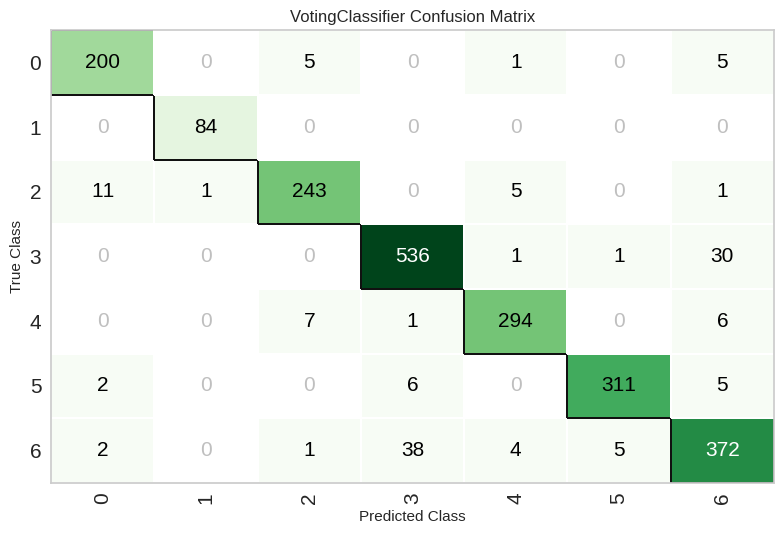

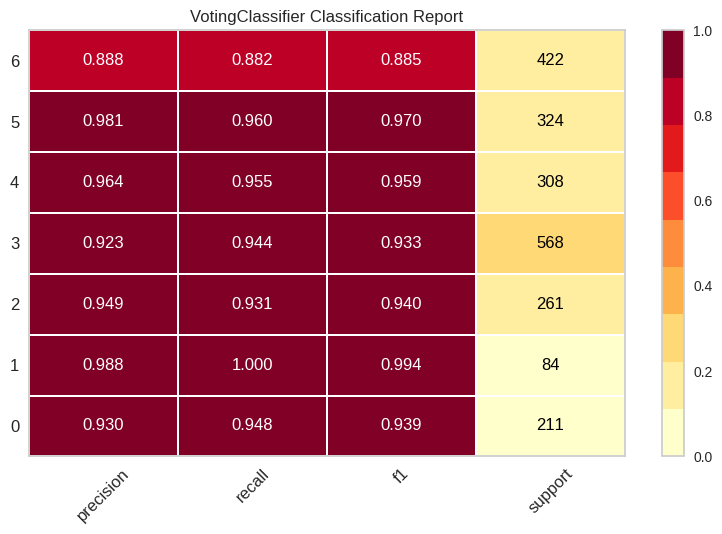

In [12]:
# Confusion matrix (per-class errors)
plot_model(final_candidate, plot='confusion_matrix')

# Class-wise precision/recall/F1
plot_model(final_candidate, plot='class_report')


## Finalize + evaluate on the external holdout

In [14]:
final_model = finalize_model(final_candidate)


Predict on the external test set we split earlier:

In [15]:
test_preds = predict_model(final_model, data=df_test)
test_preds[['Class', 'prediction_label', 'prediction_score']].head()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9240,0.9940,0.9240,0.9242,0.9240,0.9080,0.9080


,Class,prediction_label,prediction_score
12803,DERMASON,DERMASON,0.8976
3713,BOMBAY,BOMBAY,0.9896
8974,SIRA,SIRA,0.9955
1743,SEKER,SEKER,0.9988
2303,BARBUNYA,BARBUNYA,0.9748


Compute macro F1 and accuracy:

In [16]:
from sklearn.metrics import f1_score, accuracy_score

y_true = test_preds[target_col]
y_pred = test_preds['prediction_label']

print("Test Accuracy:", accuracy_score(y_true, y_pred))
print("Test Macro F1:", f1_score(y_true, y_pred, average='macro'))


Test Accuracy: 0.9239809034153507
Test Macro F1: 0.9358575699633788


## Save the pipeline (for reuse + Gradio later)

In [17]:
save_path = "drybean_multiclass_best"
save_model(final_model, save_path)


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Area', 'Perimeter',
                                              'MajorAxisLength',
                                              'MinorAxisLength', 'AspectRation',
                                              'Eccentricity', 'ConvexArea',
                                              'EquivDiameter', 'Extent',
                                              'Solidity', 'round...
                                                                           max_features='sqrt',
                                                                           max_leaf_nodes=None,
                                                          

## Gradio demo

In [18]:
create_app(final_model)

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c666dc1e2c2229145d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
